### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

In [3]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
data.isna().any().any()

False

In [7]:
## однако поскольку пропущенные данные в датасете не всегда могут будет помечены как Na, стоит проверить,
## какие значения входят в признаки

for feature in data:
    print(feature, data[feature].unique())
    print()

status ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']

duration [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]

credit_history ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']

purpose ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']

amount [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 108

значений по типу unknown / no data дейтсвительно нет, а если и появляются, то есть указание. Например, в признаке
savings значение unknown помечается через no savings account.
значит, **пропущенных значений в данных нет**

**разделим признаки в датасете на типы:**
**1. количественные:** 

количественные признаки отличить легко, их тип float или int. количественные признаки в нашем датасете следующие:

`duration`, `amount`, `age`

**2. бинарные:**

бинаные признаки должны принимать либо значение "истина", либо значение "ложь". например, пол человека - бинарный признак.

мы выделяем следующие бинарные признаки:

`telephone`, `foreign_worker`, `credit_risk`

потому что они принимают значения по типу no/yes, good/bad

**3. порядковые:**

порядковые признаки отличаются тем, что их можно выстроить в некотором отсортированном порядке, например, по возрастанию. мы выделяем следующие порядковые признаки:

`status`, `credit_history`, `savings`, `employment_duration`, `installment_rate`, `present_residence`, `number_credits`, `job`, `people_liable`

если с такими признаками, как `status`, `savings`, `employment_duration`, `installment_rate`, `present_residence`,
`number_credits` все наглядно понятно (значения, входящие в эти признаки, представляют из себя интервалы значений, которые легко выстроить в порядке возрастания), то с остальными может возникнуть спорная ситуация:

`credit_history` - мы относим так же к порядковым признакам, потому что она представляет из себя описание кредитной истории потенциального заемщика, значения из которой можно так же без затруднений выстроить по возрастанию. например, наличие у человека непогашенных кредитов будет очевидно хуже ситуации, когда у человека все взятые раннее кредиты были погашены в установленный срок. мы предлагаем следующий порядок (по возрастанию качества кредитной истории):

 'critical account/other credits elsewhere' - критическое положение с кредитами
    'delay in paying off in the past' - раннее были задолженности по кредитам
      'existing credits paid back duly till now' - есть существующие кредиты без задолженности
          'no credits taken/all credits paid back duly' - человек не брал кредиты 
            'all credits at this bank paid back duly' - все раннее взятые кредиты были выплачены вовремя
        
логика размещения последних двху следующая: нулевая кредитная история хуже хорошей кредитной истории

`job` - квалификация и устроенность человека + резидент или нет. так же легко проранжировать из логики (неквалифицирон и не резидент - неквалифицирован и резидент - ... - высоко квалифицирован)


**4. категориальные:**

признаки, способные повлиять на целевую переменную, но не представляемые в числовом виде, не имеющие ранжированный порядок. мы не можем однозначно решить, что будет выше: женский пол или мужской. 

к категориальным признакам мы отнесем следующие: 

`purpose`, `personal_status_sex`, `other_debtors`, `property`, `other_installment_plans`, `housing`

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
data.groupby(['purpose']).agg(amount = ('amount', 'mean'))

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


как мы видим, наибольшая сумма кредита была выдана под кредит для бизнеса, наименьшая - на отдых или покупку телевизора

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
# процент клиентов моложе 30, снимающих жилье:

(((data['age'] < 30) & (data['housing'] == 'rent')).sum() / (data['age'] < 30).sum()) * 100

66.66666666666666

In [10]:
# процент клиентов старше 40, снимающих жилье

(((data['age'] > 40) & (data['housing'] == 'rent')).sum() / (data['age'] > 40).sum()) * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
((data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))).sum()

1

такой результат не удивителен с учетом того, что иностранцам, как правило, сложнее получить кредит

### Задание 6 (1 балл)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

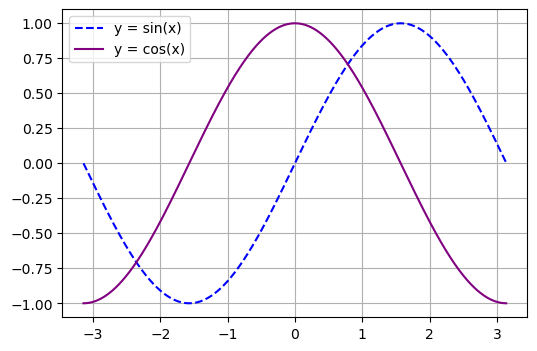

In [13]:
t = np.arange(-np.pi, np.pi, 0.01)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(t, np.sin(t), 'b--', label='y = sin(x)')
plt.plot(t, np.cos(t), 'purple', label='y = cos(x)')
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [14]:
# создадим два вспомогательных датафрейма, которые нам пригодятся как в этом задании, так и в следующих. 
# в первом из них сохраним объекты с хорошим кредитным риском, во вторым - с плохим

good_risk = data[data['credit_risk'] == 'good']
bad_risk = data[data['credit_risk'] == 'bad']

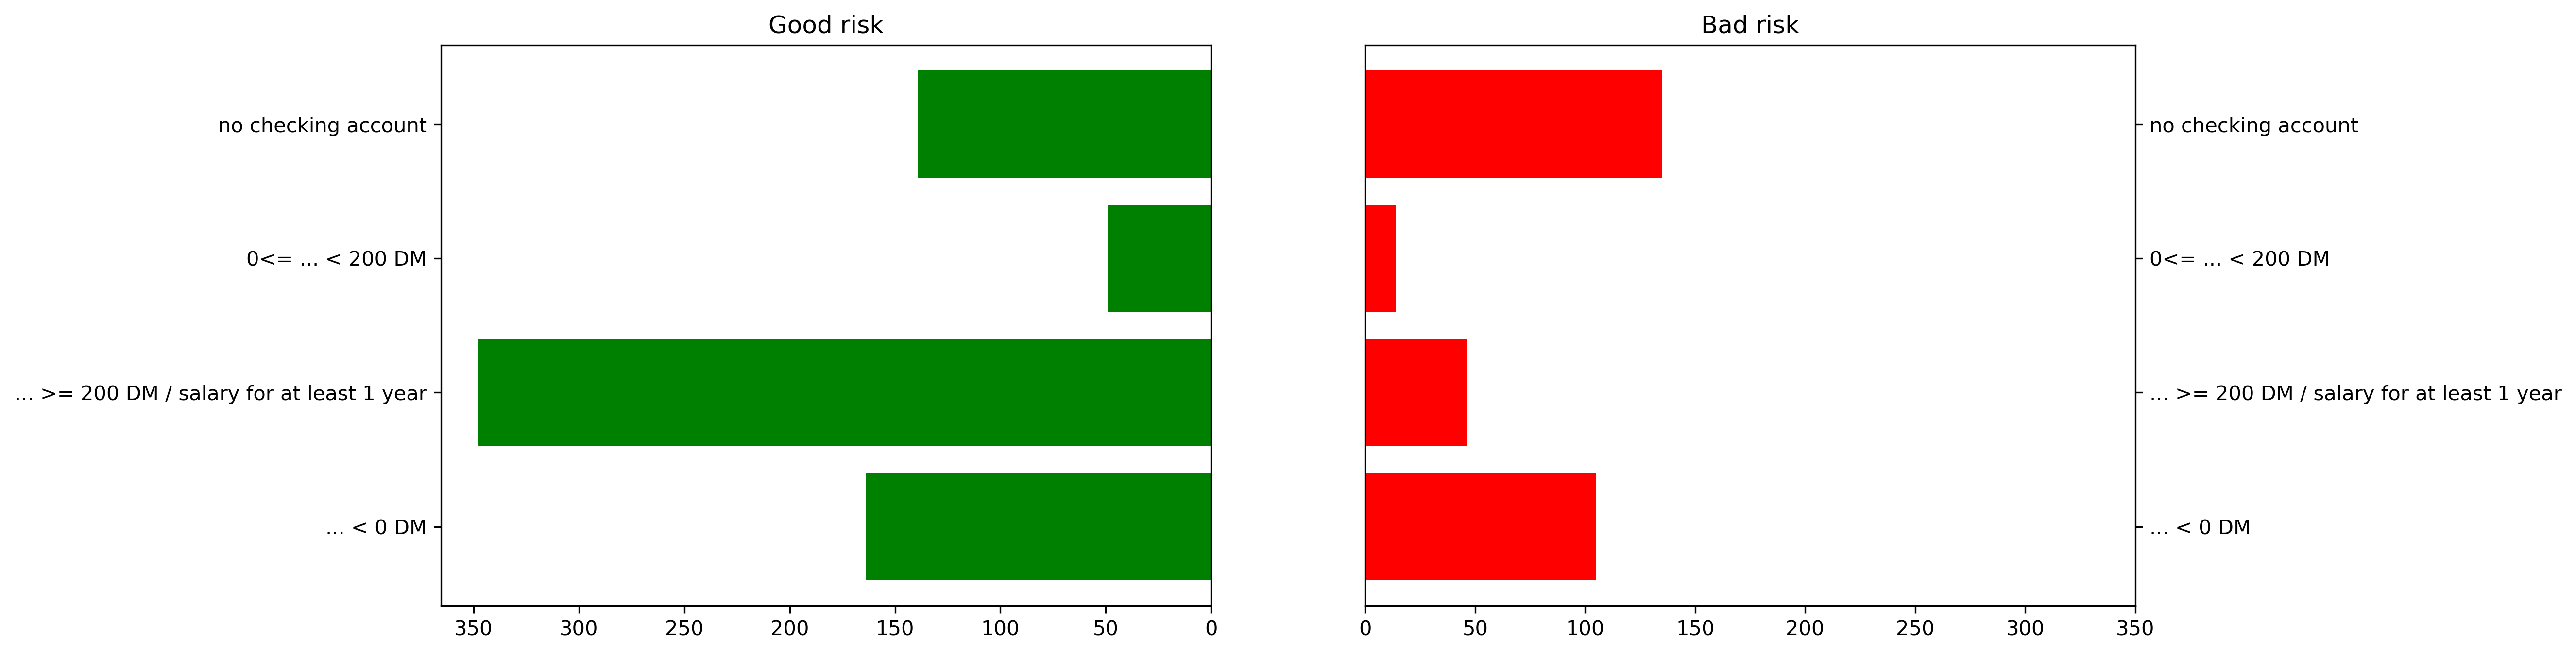

In [15]:
# сгруппируем категории из колонки status по плохому/хорошему кредитному риску и подсчитаем
x1 = good_risk.groupby('status')['credit_risk'].count()
y1 = x1.index

x2 = bad_risk.groupby('status')['credit_risk'].count()
y2 = x2.index

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

axs[0].set_title('Good risk')
axs[0].barh(y1, x1, color='g')
axs[0].invert_xaxis()

axs[1].set_title('Bad risk')
axs[1].barh(y2, x2, color='r')
axs[1].yaxis.tick_right()
axs[1].set_xlim([0, 350])

plt.show()

# Что мы видим?

Распределение кредитного риска от отсутствия аккаунта особо не зависит: мы видим, что колонки имеют практически одинаковую ширину. 

Рассмотрим далее. Количество аккаунтов с плохим риском в целом меньше - все колонки в среднее короче, чем колонки на графике с хорошим кредитным риском.

Посмотрим на левый график - гистограмму с хорошим кредитным риском. Мы замечаем, что наибольшее количество хорошего кредитно риска приходится на аккаунты с самым большим количеством накоплений на счете (строчка `>= 200 DM`), что достаточно логично: чем больше у клиента денег на счете, тем с большей вероятностью он сможет вернуть выданный ему кредит.

Нам будет логично сравнить соотношение выдачи и невыдачи кредитов в зависимости от длин колонок. Например, соотношение хороших и плохих кейсов у объектов с no checking account примерно равно 50/50, <0 уже примерно 60/40, от 0 до 200 - ближе к 80/20, больше 200 - 70/30.

Влиятельность текущего счета на выдачу хорошего кредитного риска в самом начале очевидна, однако в ситуации с большим размером текущего счета соотношение немного изменилось. Однако несмотря на это, общая тенденция очевидна: 
**чем больше средств на текущем счете, тем лучше шансы получить кредит**.

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

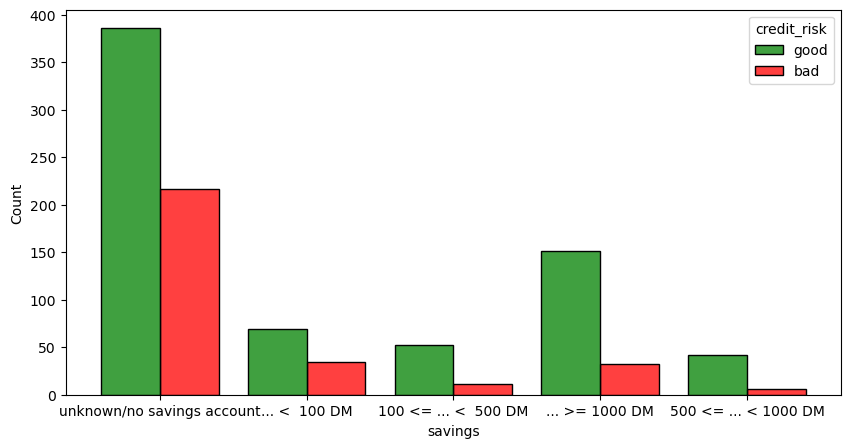

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=data[['savings','credit_risk']], x="savings", multiple='dodge', hue="credit_risk", shrink=.8,
            palette=['g', 'r'])
plt.show()

# seaborn vs matplotlib

Однозначно работать с seaborn оказалось намного удобнее: удобнее вводить параметры и легко подбирать нужный график. Разницу в восприятии результата особо не наблюдаешь: возможно, если бы графики были более информационно нагруженные, то разные библиотеки справились бы по-разному.

# Сберегательный счет и кредитный риск

Предлагаю вновь смотреть на соотношения выдачи и невыдачи кредитов из-за того, что попытка уйти в интерпретацию, основываясь на высоте столбцов, окажется немного провальной: собери мы другой датасет, в котором будет меньше объектов, например, с неизвестными данными по сберегательному счету, но больше данных по счетам, у которых <100 DM, картина бы получилась совершенно другая. Наша задача - оценить соотношение хорошего и плохого риска на каждом порядке.

Соотношение хороших/плохих кейсов в unknown/no savings account равно примерно 67/33, 

в <100 - примерно такое же, 

[100;500] - 80/20, 

[500;1000] - примерно такое же, 

выше 1000 - и вовсе почти 90/10. 

Динамика так же очевидна, хоть в этом случае шаг между каждым порядком и не такой широкий.

Можно сделтаь вывод, что размер накопительного счета так же прямо пропорционален вероятности выдачи кредите, хоть и немного в меньшей степени, чем размер текущего счета. 

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

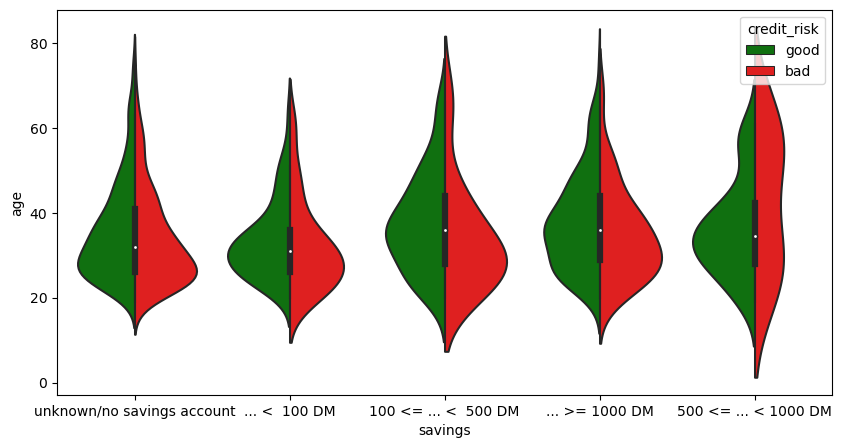

In [18]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data[['savings', 'age', 'credit_risk']], x='savings', hue='credit_risk', y='age', 
              palette=['g', 'r'], split=True)

# Возраст и сберегательный счет

Что можно заметить сразу: наши "скрипки" все оказываются более вытянутыми к промежутку от 20 до 40 лет - и это нам говорит просто о том, что больше всего в нашем датасете наблюдений с возрастом от 20 до 40 лет. 

Если честно, то кажется что распределение по возрастам на первых 4-х графиках достаточно стабильно: оно увеличено в промежутке от 20 до 40 лет, затем постепенно сужается к концу - при этом оклонения от центарльной оси, как раз-таки показывающее распределение плохих и хороших кейсов так же достаточно равномерно (имеется в виду схожая длина от центральной оси до границы графика).

Последний график вызывает уже больше вопросов: мы наблюдаем значительный перекос в сторону хорошей оценки среди обектов с возрастом от 20 до 40 лет - значит, в нашем случае, у людей в возрасте от 20 до 40 лет со сберегательным счетом от 500 до 1000 DM больше шансов получить хорошую кредитную оценку.

Однако это достаточно странный вывод, который слабо поддается экстарполяции. Скорее всего, это просто у нас такие данные попались :)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

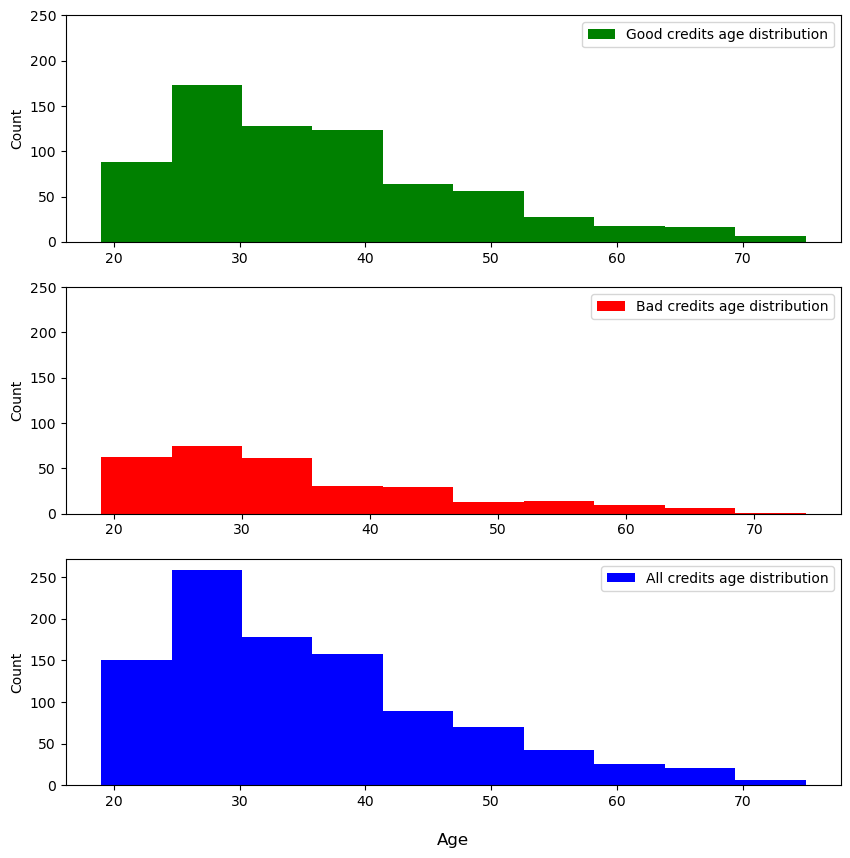

In [19]:
fig, ax = plt.subplots(3, figsize=(10, 10))

ax[0].hist(data['age'].loc[data['credit_risk'] == 'good'], color = 'g', bins=10, 
           label='Good credits age distribution')

ax[0].set_ylim([0, 250])
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].hist(data['age'].loc[data['credit_risk'] == 'bad'], color='r', bins=10, 
           label='Bad credits age distribution')
ax[1].legend()

ax[1].set_ylim([0, 250])
ax[1].set_ylabel('Count')

ax[2].hist(data['age'], color='b', bins=10, label='All credits age distribution')
ax[2].set_ylabel('Count')
ax[2].legend()

plt.title('Age', y=-0.3)
plt.show()

И вновь: количество как положительных, так и отрицательных кейсов повышается в районе 25-40 лет - это говорит о том, что просто чаще всех остальных наблюдей в нашем датасете кредиты берут люди в возрасте от 25 до 40 лет. А последняя, синяя гистограмма, показывающая распределение по возраста без зависимости от кредитного риска это лишь подтверждает - у нас есть пик наблюдений с возрастом 25-40 лет. 

Можем предположить, что возраст оказывает незначительное влияние на оценку кредитного риска, однако не будем спешить и посмотрим на еще несколько графиков.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

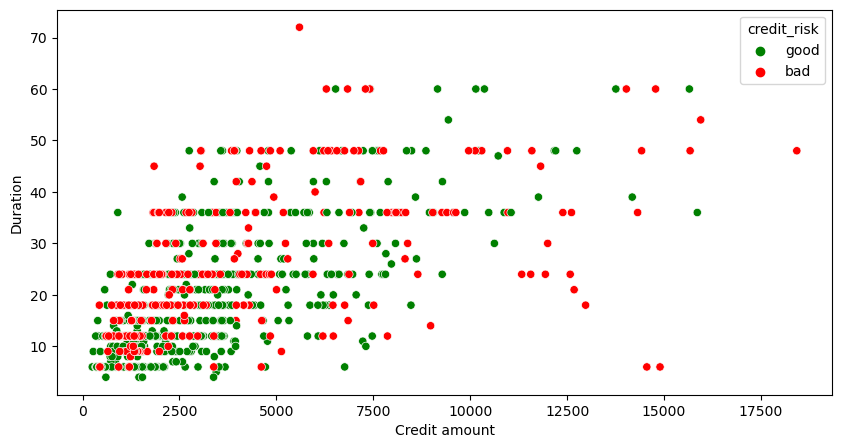

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=['g', 'r'])
plt.xlabel('Credit amount')
plt.ylabel('Duration')

# Продолжительность и размер кредита

Рассмотрим левый нижний угол. Точки в этом угле диаграммы соответстсуют кредитам с небольшой продолжительностью и малой суммой выдачи, и мы видим, что там действительно сосредоточенно много зеленых (хороший кредитный риск) точек.

Красные точки так же наложены на зеленые - в этом же угле есть некоторое кол-во кейсов, когда кредиты не одобрили. Видимо, в этих случаях сыграли другие факторы.

Главная тенденция, которую мы можем заменить - это то, что зеленые точки расположены относительно равномерно диагональной оси - кредиты с адекватной суммой и адекватно соответвующему сроку выдачи, как правило, одобрялись. 

Интерснее посмотреть на выбросы на диаграмме: например, две красные точки с продолжительностью меньше 10 месяцев и кредитной суммой примерно 15000 - слишком большая сумма для такого короткого периода. Аналогично, например, можно посмотреть на красную точку с суммой кредита 5000 и продолжительностью более 70 месяцев. 

Можем сделать следующий вывод: влияет не только размер кредита и продолжительность срока заема, но и их адекватное соотношение: логично, что кредиты с более высокой сумой заема должны будут выдаваться на больший срок, и наоборот.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

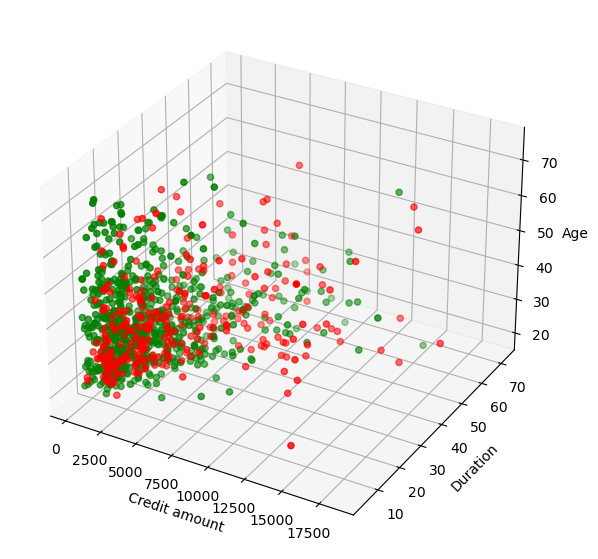

In [21]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs=good_risk['amount'], ys=good_risk['duration'], zs=good_risk['age'], c='g')
ax.scatter(xs=bad_risk['amount'], ys=bad_risk['duration'], zs=bad_risk['age'], c='r')

ax.set_xlabel('Credit amount')
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
plt.show()

# Страх и ужас в 3д

Интерпретировать такое тяжело, но мы постараемся посмотреть на самые очевидные закономерности. 

Хорошо видно, что при более низком возрасте (рассматриваем точки, расположенные как бы в нижнем слое куба) с увеличением кредитной суммы пропадают зеленых точки - чем ниже возраст, тем меньше шансов что выдадут большой кредит.

Посмотрим вглубь сосредоточения точек. Кажется, что в верхней части зеленых точек больше чем красных - возможно, что при более высоком возрасте кредитный риск в целом будет получше. 

Можно предположить, что в целом возраст может повлиять на размер выданного кредита.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

## почему не через LabelEncoding?
кодировать порядковые и бинарные признаки мы будем через OrdinalEncoding, вручную прописывая рейтинг значений, потому что метод label encoding не дает нужные результаты. например, при кодирование признака `savings` значению *unknown/no savings account* давалась цифра 4, при этом остальным знгачениям, отражающим количество накоплений значения давались по возрастанию. тем самым, выходит ситуация, когда при построении модели прогноза с бинарным ответом "выдать кредит" или "не выдать кредит" получилось бы, что отсутствие накоплений **увеличивало** бы вероятность выдать кредит. 

In [22]:
# для удобства некоторых следующих операций нам стоит сейчас сохранить названия столбцов с порядковыми и бинарными
# элементами в один список

ordinal_data = ['status', 'credit_history', 'savings', 'employment_duration', 'installment_rate',
               'present_residence', 'number_credits', 'job', 'people_liable', 'telephone', 
                'foreign_worker','credit_risk']

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# ниже мы создаем словарь, где по ключам названий столбцов с порядковыми переменными находится список с
# отсортированными значениями. этот словарь нам понадобится для OrdinalEncoding

categories = {
        'status': ['no checking account',
                   '... < 0 DM',
                   '0<= ... < 200 DM', 
                   '... >= 200 DM / salary for at least 1 year'],
 
    'credit_history': ['all credits at this bank paid back duly',
                       'no credits taken/all credits paid back duly',
                       'existing credits paid back duly till now',
                       'delay in paying off in the past',
                       'critical account/other credits elsewhere'],
    
    'savings': ['unknown/no savings account', 
                '... <  100 DM', 
                '100 <= ... <  500 DM',
                '500 <= ... < 1000 DM', 
                '... >= 1000 DM' ],
    
    'employment_duration': ['unemployed', 
                            '< 1 yr', 
                            '1 <= ... < 4 yrs', 
                            '4 <= ... < 7 yrs', 
                            '>= 7 yrs'],
    
    'installment_rate': ['< 20', 
                         '20 <= ... < 25', 
                         '25 <= ... < 35', 
                         '>= 35'],
    
    'present_residence': ['< 1 yr', 
                          '1 <= ... < 4 yrs', 
                          '4 <= ... < 7 yrs', 
                          '>= 7 yrs'],
    
    'number_credits': ['1', '2-3', '4-5', '>= 6'],
    
    'job': ['unemployed/unskilled - non-resident', 
            'unskilled - resident',
            'skilled employee/official', 
            'manager/self-empl./highly qualif. employee'],
    
    'people_liable': ['0 to 2', '3 or more'],
    
    'telephone': ['no','yes (under customer name)'],
    
    'foreign_worker': ['no', 'yes'],
    
    'credit_risk': ['bad', 'good'],
}

enc = OrdinalEncoder(categories=[categories[column] for column in ordinal_data], dtype=int)
data[ordinal_data] = enc.fit_transform(data[ordinal_data])


In [24]:
data.drop(columns=['other_installment_plans', 'other_debtors', 'housing', 'purpose', 'personal_status_sex',
                  'property'], inplace=True)

In [25]:
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,0,1049,0,1,0,3,21,0,2,0,0,0,1
1,0,9,0,2799,0,2,2,1,36,1,2,1,0,0,1
2,1,12,1,841,1,3,2,3,23,0,1,0,0,0,1
3,0,12,0,2122,0,2,1,1,39,1,1,1,0,1,1
4,0,12,0,2171,0,2,0,3,38,1,1,0,0,1,1


# Готово!

Мы закодировали порядковые и бинарные переменные, категориальные данные редуцировали.

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

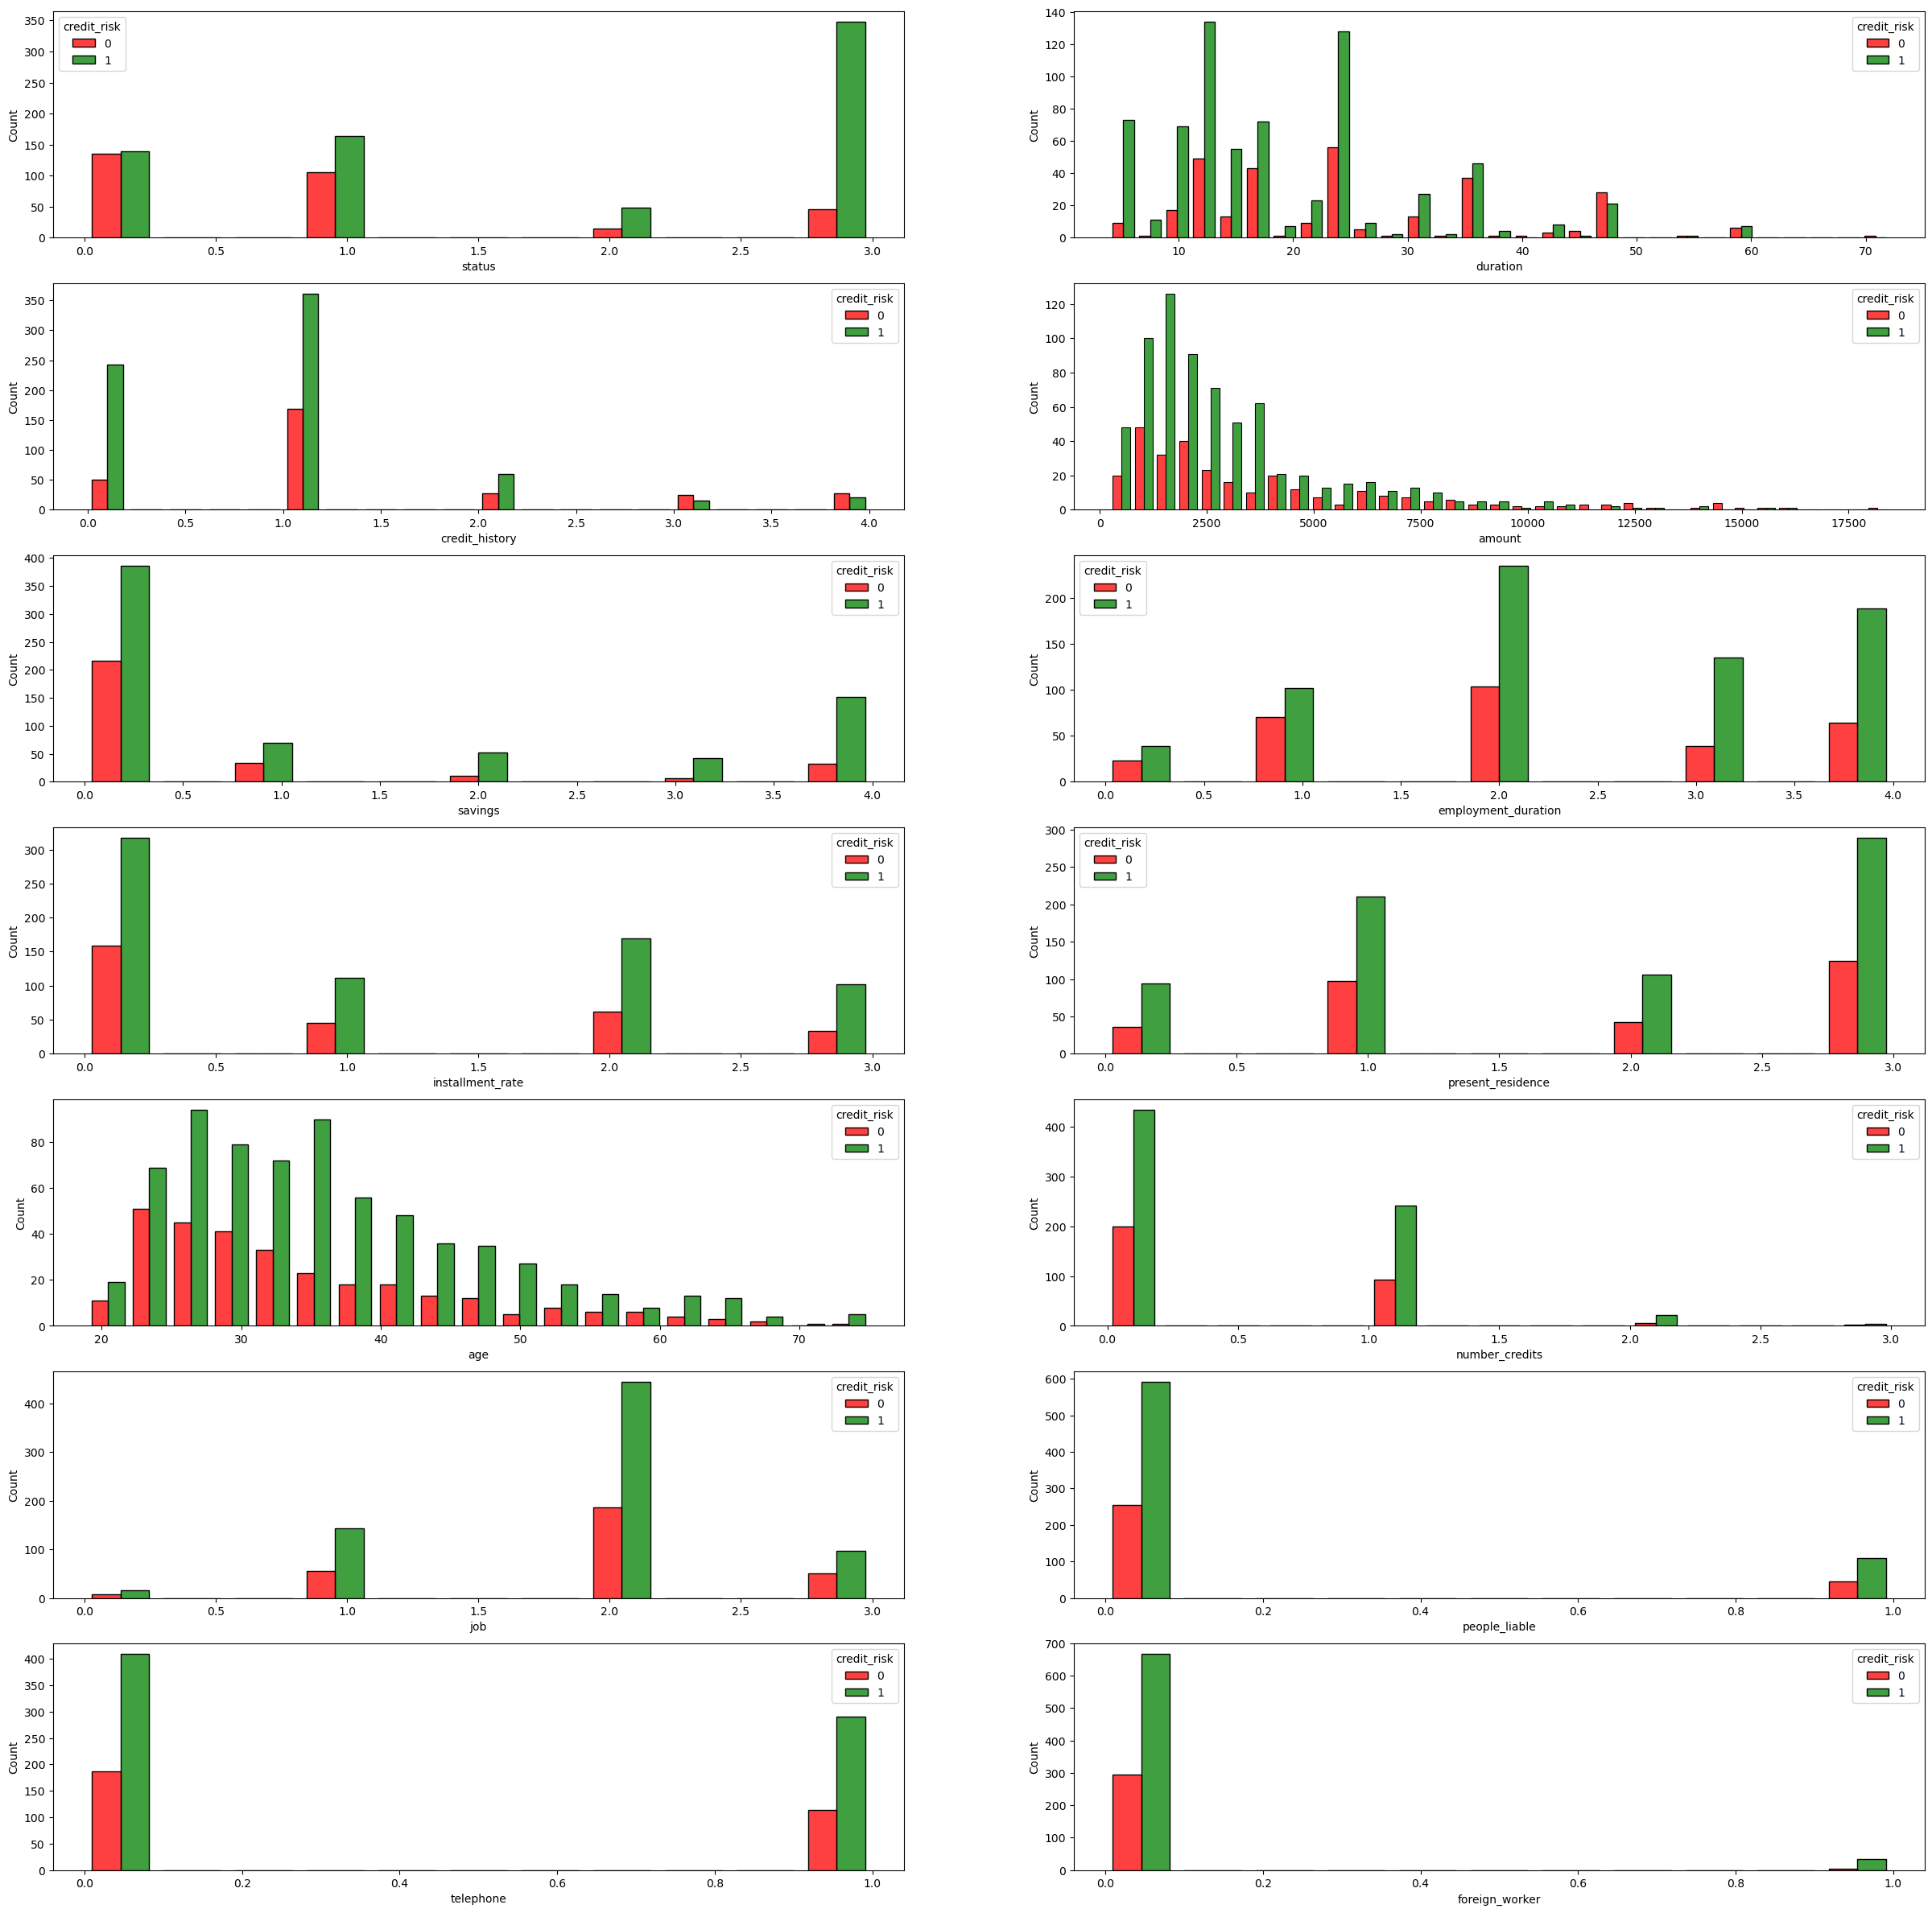

In [26]:
## предлагаю перед следующим шагом посмотреть на еще пару графиков

fig, ax = plt.subplots(7, 2, figsize=(30, 30))
k = 0
for i in range(7):
    for j in range(2):
        sns.histplot(ax=ax[i][j], data=data[[data.columns[k],'credit_risk']], x=data.columns[k], multiple='dodge', hue="credit_risk", shrink=.8,
            palette=['r', 'g'])
        k += 1

# Кажется, что всех 14 переменных будет многовато.

Предлагаю посмотреть на соотношения зеленых и красных столбцов, выбрать самые влиятельные, подобрать им коэффициенты и затем уже сделать формулу предсказывания.

Самые влиятельные переменные по моему мнению и в соответствии с построенными графиками:

`status`, `duration`, `credit_history`,  `savings`, `age`

Удивительно, но эти переменные действительно оказались самыми влиятельными. Посмотрим на другие, например, на job - соотношение каждых столбцов на каждом порядке 50/50! Значит, можем преподолжить, что уровень квалификации не влияет на шанс выдачи кредита. По аналогии были рассмотрены и остальные признаки.

Переменные `credit_history` и `duration` будут рассчитаны с отрицательным коэффициентом, так как на графике видно, что с их ростом соотношение красного и зеленого столбцов переходит в пользу красного - шанс получить кредит меньше.

**Веса мы будем расставлять следующим образом:**

для порядковых переменных: 1/(n-1), где n = количество порядков. Таким образом, максимальное возможное произведение веса на порядок будет равно 1, минимальное - 0

для количественных переменных: 1/(max - min) - получается, делим на что-то вроде размаха данных.

присваивать значение 0 или 1 будем следующим образом: найдем среднее арифметическое между минимальным возможным значением и максимально возможным значением (взвешенная сумма) и будем сравнивать по нему: если меньше - то 0, если больше - то 1.

In [43]:
## найдем порог

min_poss = np.dot(np.array([1/3, -1/71, -1/4, 1/4, 1/53]),
                   np.array([data['status'].min(), data['duration'].max(), data['credit_history'].max(), 
                   data['savings'].min(), data['age'].min()]))
         
max_poss = np.dot(np.array([1/3, -1/71, -1/4, 1/4, 1/53]), 
                   np.array([data['status'].max(), data['duration'].min(), 
                   data['credit_history'].min(), 
                   data['savings'].max(), data['age'].max()]))

limit = (min_poss + max_poss) / 2
limit

0.8515811852245548

In [48]:
def predict(X_test: np.array) -> np.array:
    X_test = X_test[:, [0, 1, 2, 4, 8]]
    ans = np.dot(X_test, np.array([1/3, -1/(X_train[[0]].max() - X_train[[0]].min()), -1/4, 1/4, 
                                   1/(X_train[[8]].max() - X_train[[8]].min())]))
    return np.where(ans > limit, 1, 0)
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Используйте X_train и y_train на ваше усмотрение
## найдем порог

min_poss = np.dot(np.array([1/3, -1/71, -1/4, 1/4, 1/53]),
                   np.array([X_train[[0]].min(), X_train[[1]].max(), X_train[[2]].max(), 
                   X_train[[4]].min(), X_train[[8]].min()]))
         
max_poss = np.dot(np.array([1/3, -1/71, -1/4, 1/4, 1/53]), 
                   np.array([X_train[[0]].max(), X_train[[1]].min(), 
                   X_train[[2]].min(), 
                   X_train[[4]].max(), X_train[[8]].max()]))

limit = (min_poss + max_poss) / 2
limit

accuracy_score(y_test, predict(X_test))

/var/folders/2d/6mndjjlj3wzc4ynrb3dn_w6m0000gn/T/ipykernel_17110/1351735175.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.34

In [49]:
accuracy_score(y_train, predict(X_train))

0.2866666666666667

In [50]:
X_train[[1]].max()

6419

In [54]:
X_train[[1]]

array([[   0,   24,    0, 6419,    0,    4,    2,    3,   44,    1,    3,
           1,    1,    0]])

**Даже такая глиняная формула, созданная наобум из предположения о равноценности изменений всех признаков и просто с тупо подобранными по размаху весами, построила нам относительно неплохую модель!**

Целых 68 процентов!

Восхитительно!

поставьте 2 балла пожалуйста